In [3]:
print("Hello World!")

Hello World!


In [4]:
import gzip

counts = dict()

with gzip.open("./raw/sample.ann.vcf.gz", "rt") as file:
    for line in file:
        if line.startswith("##"):
            continue

        if line.startswith("#"):
            header = line.strip().split("\t")
            format_idx = header.index("FORMAT")
            sample_idx = header.index("sample")
            continue

        format = line.strip().split("\t")[format_idx]
        sample = line.strip().split("\t")[sample_idx]

        GT_idx = format.split(":").index("GT")

        target = sample.split(":")[GT_idx].replace("|", "/")

        if target not in counts:
            counts[target] = 0  ## 초기화
        counts[target] += 1

print(counts)

{'1/1': 2133, '0/1': 6031, '1/2': 78}


In [5]:
## Data libs


import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns



In [8]:
##make DataFrame

df = pd.DataFrame(
    {
        'Name':["Person1", "Person2", "Person3"],
        'Systolic':[122,134,110],
        'Diastolic':[79, 88, 76]
    }
)

print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,Name,Systolic,Diastolic
0,Person1,122,79
1,Person2,134,88
2,Person3,110,76


(array([0, 1, 2]),
 [Text(0, 0, 'Person1'), Text(1, 0, 'Person2'), Text(2, 0, 'Person3')])

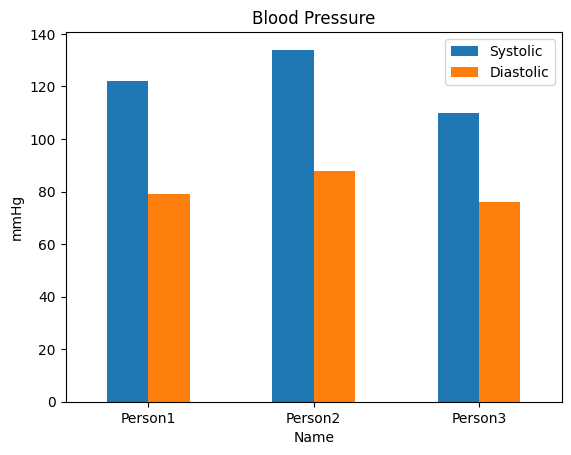

In [12]:
df.plot(
    x='Name', y=['Systolic', 'Diastolic'], 
    kind="bar",
    title="Blood Pressure",
    ylabel="mmHg",
    
) ## pandas plot

plt.xticks(rotation=0)

In [18]:
gt_data = {'genotype':counts.keys(), 'counts': counts.values()}

gt = pd.DataFrame(gt_data)

gt

,genotype,counts
0,1/1,2133
1,0/1,6031
2,1/2,78


In [19]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genotype  3 non-null      object
 1   counts    3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


(array([0, 1, 2]), [Text(0, 0, '1/1'), Text(1, 0, '0/1'), Text(2, 0, '1/2')])

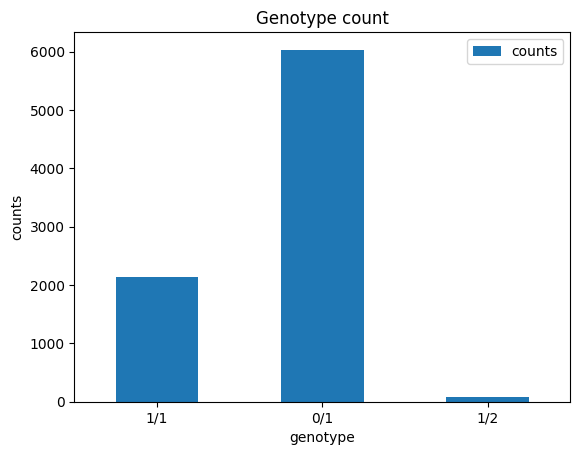

In [22]:
gt.plot(
    x='genotype', y='counts', 
    kind="bar",
    title="Genotype count",
    ylabel="counts",
    
) ## pandas plot

plt.xticks(rotation=0)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'A'), Text(1, 0, 'T'), Text(2, 0, 'G'), Text(3, 0, 'C')])

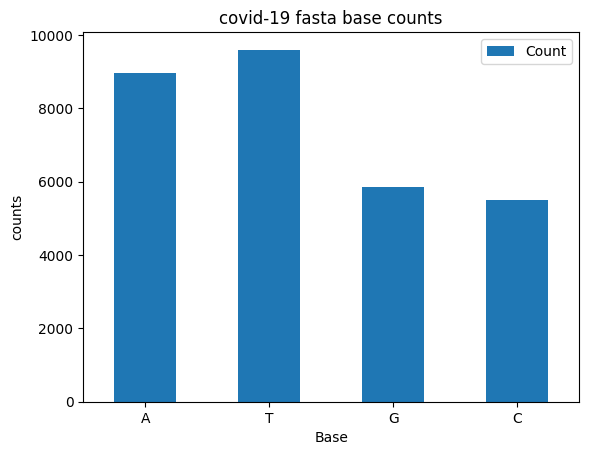

In [25]:
seq = ""
with open("./raw/NC_045512.fasta") as file:
    for line in file:
        if line.startswith(">"):
            continue

        seq += line.strip()  # enter del

seq_df = pd.DataFrame(
    {
        'Base':['A','T','G','C'],
        'Count':[seq.count("A"), seq.count("T"), seq.count("G"), seq.count("C")]
    }
)

seq_df.plot(
    x='Base', y='Count', 
    kind="bar",
    title="covid-19 fasta base counts",
    ylabel="counts",
    
) ## pandas plot

plt.xticks(rotation=0)